<a href="https://colab.research.google.com/github/ANUPRIYAR/Face-Recognition/blob/master/Autoencoder_Dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import SGD
from keras.datasets import mnist
from keras import Input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [34]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# **Preprocessing the image in range 0 to 1** 

In [43]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


# Fatten the image
# flatten_size = 28*28
# x_train = x_train.reshape(x_train.shape[0], flatten_size)
# x_test = x_test.reshape(x_test.shape[0], flatten_size)
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# **Build an Autoencoder**

In [36]:
encoder = Sequential()
# encoder.add(Input(shape=(784,)))
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(2, activation='relu'))

decoder = Sequential()
# decoder.add(Input(shape=(2,)))
decoder.add(Dense(50, input_shape=[2], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(28*28, activation='relu'))
decoder.add(Reshape([28,28]))

In [37]:
Autoencoder = Sequential([encoder, decoder])

In [38]:
Autoencoder.compile(loss='mse')
Autoencoder.fit(x_train,x_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0749
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0503
Epoch 3/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0468
Epoch 4/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0439
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0440
Epoch 6/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0434
Epoch 7/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0425
Epoch 8/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0419
Epoch 9/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0411
Epoch 10/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0410
Epoch 11/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0403
Epoch 12/50
1875/1875 [==============================] - 13s 7ms/step - lo

In [44]:
encoded_2dim = encoder.predict(x_train)
AE = pd.DataFrame(encoded_2dim, columns = [ 'x1', 'x2'])
AE['target']= y_train

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

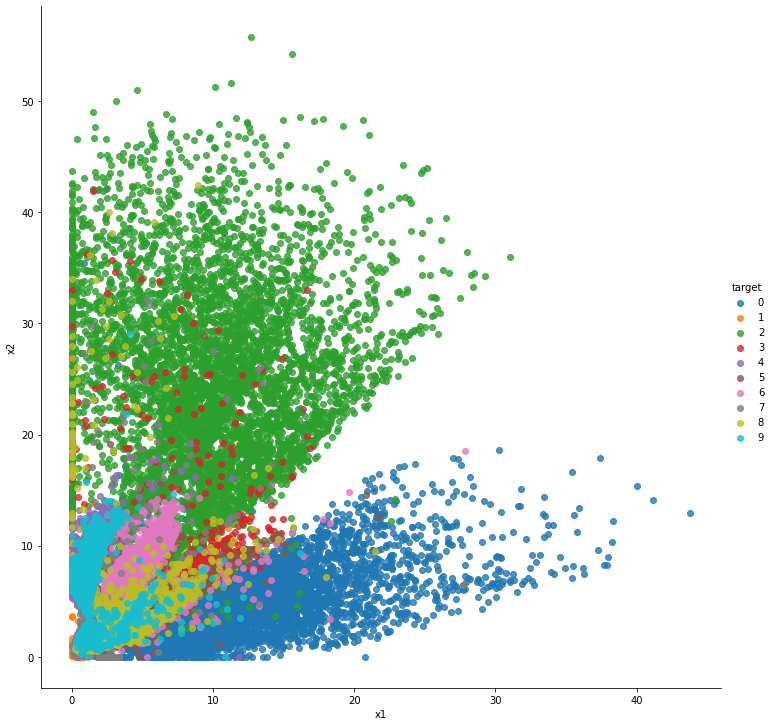

In [50]:
plt.figure(figsize=(20,20))
sns.lmplot(x='x1', y='x2', data=AE, hue='target', fit_reg=False, size=10)
plt.show()